# Practical 23: Estimating Mantle Temperature #
## John Maclennan, Lent 2021 ##


## 1. Petrological and Geochemical Constraints on Mantle Temperatures

In earlier lectures and practicals you have examined some of the methods that have been used to estimate mantle potential temperatures, $T_p$, from observations at mid-ocean ridges. In particular we have investigated how correlated variations in oceanic crustal thickness, ridge axial depth and MORB chemistry can be understood within the framework of a simple model of adiabatic decompression melting. The correlated variations are thought to reflect variations in $T_p$ of about 200$^{\circ}$C around the global MOR system.

It is useful to find independent observations that can be used to constrain $T_p$ that rely on different sets of assumptions to those involved in the modelling described above. One of the most promising of these is a technique based on the temperature-dependence of aluminium partitioning into olivine (Al-in-ol thermometer).

## 2. How Does Al-in-ol Thermometry Work?

### 15 minutes ###

As you might expect from thermodynamic arguments, the ability of olivine to tolerate Al within its structure increases with increasing temperature. In effect, the partition coefficient of Al between olivine and melt rises at higher temperatures. It is also well known that the partitioning of Fe and Mg between olivine and melt is strongly temperature dependent. So, if we can find pairs of olivine and liquid that we know were in chemical equilibrium at igneous conditions, we might be able to use them as thermometers - much like the approach that you may familiar with from metamorphic petrology.

### Petrography, chemical mapping and equilibrium
Take a look at the image below, which shows a map of the Fe content of part of the glassy rim of an olivine-porphyritic pillow lava. The basaltic glass is blue and olivines are mostly green. 

![](femap.jpg)

The zonation patterns observed in the olivines are almost ubiquitous in macrocrysts from MORB. 

__Q2.1 What challenges do such zoning patterns present for thermometry in basaltic systems?___

_ANSWER_

### Thermometry equations

In order to circumvent these problems, workers such as [Coogan et al.](http://www.sciencedirect.com/science/article/pii/S0009254114000278) have investigated the partitioning of Al between olivine and spinel. The hope here is that spinel inclusions trapped inside olivine crystallisting from primitive melts can retain their high temperature equilibrium compositions because Al diffusion is very slow in olivine. Chromian spinel is a common liquidus phase in primitive basaltic melts, so is often found in association with highly forsteritic olivines that grow at high temperatures in basaltic systems.

Coogan et al. suggested that the dominiant mode of Al exchange between olivine and spinel involved the following reaction:



$$\require{mhchem}$$


$\ce{MgAl2O4 (spinel) -> (MgAl) AlO4 (olivine)}$

with the charge balance being maintained as $\ce{Al^{3}+}$ replaces one $\ce{Mg^{2}+}$ on an M site and one $\ce{Si^{4}+}$ on a T site when compared with forsterite $\ce{Mg2SiO4}$. Their experimental data was used to provide the following empirical thermometer for Al-in-ol:

$$T = \frac{10000}{(A +B \times Cr{\#} + C \times \ln{k_d})}$$

where $T$ is the equilibrium temperature in Kelvin, the 'chrome-number' of the spinel is given by: 

$$ Cr{\#} = \frac{X_{Cr}}{X_{Cr}+X_{Al}}$$

with $X_{Cr}$ and $X_{Al}$ being the mole fractions of Cr and Al in the spinel. The partition coefficient of Al between the olivine and spinel is given by 

$$ k_d = \frac{\ce{Al2O3^{ol}}}{\ce{Al2O3^{sp}}}$$

with $\ce{Al2O3^{ol}}$ and $\ce{Al2O3^{sp}}$ being wt% oxide contents of Al in the olivine and spinel respectively. The constants in the thermometer are determined by multiple linear regression and are given as $A= 0.575 \pm 0.162$, $B= 0.884 \pm 0.043$ and $C = -0.897 \pm 0.25$ by Coogan et al.

Check by inspection of the equations that you can see that higher Al contents in olivines correspond to higher temperatures of equilibration.

## 3. Application of the Thermometer to data from Spreading Ridges ##

### 30 minutes ###

### Data Processing 
A table is provided in the file *olsp.csv* that contains olivine and spinel compositions from various spreading ridge settings. Using what you learnt in the last practical, read in this file. Read the [manual](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) and add this line of code to a cell below. 

__HINT 1: A good place to start is to look at the example usage__

__HINT 2: You'll need to read this into a "dataframe"__

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [22]:
olsp = pd.read_csv('olsp.csv')
olsp

,Ridge,Locality,Sample,SiO2_ol,MgO_ol,FeO_ol,NiO_ol,CaO_ol,Al2O3_ol,MgO_sp,Cr2O3_sp,Al2O3_sp,FeO_sp
0,Iceland,Borgahraun,BH22,40.86,47.05,10.19,0.28,0.37,0.072,15.48,43.68,24.95,14.76
1,Iceland,Borgahraun,BH22,40.69,46.41,11.21,0.30,0.37,0.064,15.25,40.94,26.74,16.02
2,Iceland,Borgahraun,BH22,40.07,44.50,14.02,0.23,0.38,0.052,12.81,40.63,22.79,21.67
3,Iceland,Borgahraun,BH22,40.20,46.80,11.36,0.28,0.33,0.076,18.42,20.75,44.33,14.21
4,Iceland,Borgahraun,BH38,40.33,47.74,9.71,0.29,0.38,0.072,17.98,27.88,37.94,13.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,EPR_ancient,NW Pacific,DSDP88 581C-3-2 (40-42),40.26,46.47,12.20,0.27,0.30,0.035,15.57,24.34,38.44,18.31
78,EPR_ancient,NW Pacific,DSDP88 581C-3-3 (18-20),40.05,46.52,11.71,0.29,0.33,0.042,16.69,25.17,38.72,16.00
79,EPR_ancient,NW Pacific,DSDP88 581C-3-3 (93-95),40.24,47.42,10.82,0.32,0.31,0.049,17.65,25.71,39.28,14.30
80,EPR_ancient,NW Pacific,DSDP88 581C-3-3 (93-95),40.54,47.44,11.08,0.32,0.30,0.042,17.92,25.26,39.48,14.64


The compositions are provided as wt% oxides and the olivine compositions are in columns with the "_ol" in the header and the spinel compositions have "_sp". Next, we should calculate the forsterite content of the olivines and store it in the same data file. Use the same approach as in the previous practicals to add a new column to your dataframe that contains your estimate of forsterite content. Here is a [useful Pandas data wrangling cheatsheet](https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf) - look for "Make New Columns". To calculate the molar proportion of forsterite in the olivine compositions we need to set the molecular weights of FeO and MgO.  

In [23]:

mfeo = 71.844
mmgo = 40.3044
olsp['fo'] =(olsp.MgO_ol/mmgo)/((olsp.MgO_ol/mmgo) + (olsp.FeO_ol/mfeo))
olsp.fo

0     0.891663
1     0.880665
2     0.849801
3     0.880147
4     0.897583
        ...   
77    0.871625
78    0.876259
79    0.886521
80    0.884153
81    0.882031
Name: fo, Length: 82, dtype: float64

Now, let's make a plot to see if we can see any obvious differences in the Al content of olivines from different portions of the mid-ocean ridge system. Rather than using `pygmt` as in previous practicals, we will save memory by user the leaner approach of `pandas` and `matplotlib` because we are not making maps today. 

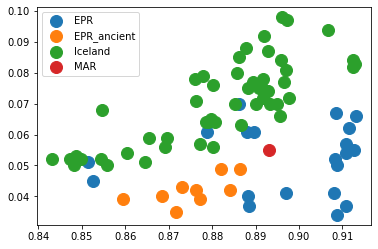

In [26]:
# Plot
groups = olsp.groupby('Ridge') # in this case olsp is the dataframe name with the olivine and spinel data

fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups: # loops through the groups
    ax.plot(group.fo, group.Al2O3_ol, marker='o', linestyle='', ms=12, label=name) # edit this line to plot what you need
ax.legend() # plots legends

plt.show()



__Q3.1 Based on the observations in this graph, what would be your initial estimate of the relative $T_p$ in Iceland and other stretches of spreading ridges? Justify this answer.__

_ANSWER_ 



## 4. Quantifying Crystallisation Temperatures ##

### 30 minutes ###

Next, we should quantify the crystallisation temperatures, putting code in the cell below. First, calculate the terms required for the thermometry equation. Define the constants that you will need. Then generate a new column in a similar way as shown in the forsterite example above to calculate the individual terms in the equation and then the temperature estimate itself.

In [30]:
# write code here

olsp['kd'] =(olsp.Al2O3_ol/olsp.Al2O3_sp)
mal2o3 = 101.96 # molecular weight of al2O3
mcr2o3 = 151.9904 # molecular weight of cr2o3
a=0.575
b=0.884
c=-0.897
olsp['xcr'] =(olsp.Cr2O3_sp/mcr2o3)/((olsp.Al2O3_sp/mal2o3) + (olsp.Cr2O3_sp/mcr2o3))
olsp['tk'] = 10000./(a + b*olsp.xcr + c*np.log(olsp.kd)) # don;t forget the natural log!
olsp.tk

0     1587.785794
1     1553.681160
2     1535.451135
3     1538.708713
4     1541.195179
         ...     
77    1404.711714
78    1435.389154
79    1461.423309
80    1432.412187
81    1462.476686
Name: tk, Length: 82, dtype: float64

Next, plot the crystallisation temperature estimate, in $^{\circ}$C, against the forsterite content of the olivine. The `pandas` [scatter plot](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.scatter.html) is a quick way of doing this. If needs be you can subset the data according to Locality. 

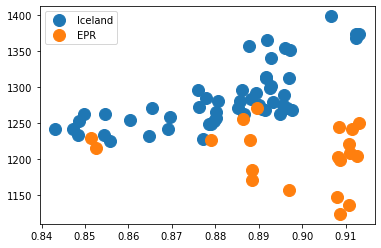

In [42]:
# write code here
olsp['tc'] = olsp.tk-273.15

olsp_ice = olsp[olsp.Ridge == "Iceland"]
olsp_epr = olsp[olsp.Ridge == "EPR"]

fig, ax = plt.subplots()
ax.plot(olsp_ice.fo, olsp_ice.tc, marker='o', linestyle='', ms=12, label="Iceland") # replace df with the name of your dataframe.
ax.plot(olsp_epr.fo, olsp_epr.tc, marker='o', linestyle='', ms=12, label="EPR")
ax.legend() # plots legends

plt.show()


__Q4.1 Comment on the observed relationship between olivine-spinel equilibration temperature and host olivine forsterite content within the Icelandic sample set. Which of these olivine-spinel pairs is most suitable for estimating mantle temperatures?__

_ANSWER_



__Q4.2 What is the apparent temperature difference between the crystallisation of the most primitive melts from Iceland and the East Pacific rise? How does this difference compare with the global temperature variations inferred from the correlations between observed Na<sub>8</sub> and oceanic crustal thickness?__

_ANSWER_


## 5. Estimating Potential Temperature ##

### 45 minutes ###

Now we can use the estimates of crystallisation temperature of primitive melts from Iceland and the EPR to infer mantle $T_p$ in these settings.

__Q5.1 Why are maximum crystallisation temperatures and mantle $T_p$ not identical?__

_ANSWER_


In order to convert crystallisation temperatures in $T-p$ estimates is to necessary to make a number of simplifying assumptions. First of all, we need a parameterisation of the shape of the solidus for typical lherzolitic upper mantle. [Hirschmann](https://www.esci.umn.edu/sites/www.esci.umn.edu/files/groups/hirschmann/peridotite-solidus-G3.pdf) provided a parameterisation of the solidus of such material as 

$$T_s = -5.410P^{2} + 132.99P + 1120.661$$

with $T_s$ in $^{\circ}$C and $P$ in GPa. Furthermore, the temperature at any depth along a geotherm defined by the adiabat for mantle of a fixed potential temperature in __Kelvin__ is given by 

$$ T_z = T_p \exp{\left[ \frac{g \alpha z}{C_p} \right]} $$

with the specific heat capacity $C_p = 1300$ J kg<sup>-1</sup> K<sup>-1</sup> and the thermal expansion coefficient, $\alpha = 1.5 \times 10^{-5}$ K<sup>-1</sup>.

__5.2 Express this function in terms of pressure rather than depth, and alter the units such that $P$ is in GPa and temperatures in $^{\circ}$C.__

_ANSWER_


Functions can be plotted and labelled in `Python` and `Matplotlib` using the following commands, with the examples here being a straight line $y_1=mx+c$ and the curve $y_2=x^2$

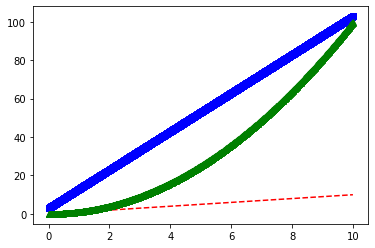

In [44]:
def y1(x):
    m=10
    c=3
    y = m*x +c
    return y   

def y2(x):
    y = x*x
    return y

# create an array containing x values
x = np.arange(0., 10., 0.01)

# red dashes, blue squares and green triangles - note how to develop the functional form
plt.plot(x, x, 'r--', x, y1(x), 'bs', x, y2(x), 'g^')
plt.show()


__Q5.3 Write code into the cell below to plot the lherzolite solidus and adiabats for $T_p$ of 1300$^{\circ}$C, 1400$^{\circ}$C and 1500$^{\circ}$C. Plot these as a function of pressure, $P$, in GPa.__


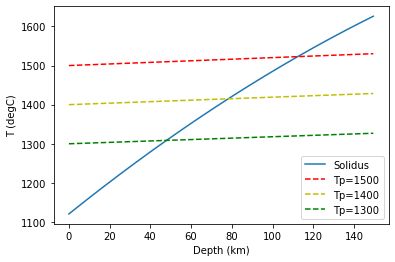

In [51]:
# HINT - use the example from above as a starting point!
# solidus temperature
def ts_c(z):
    a = -5.41
    b = 132.99
    c = 1120.661
    rho = 3200 # kg m-3
    g = 9.82 # m s-2
    P = rho*g*z
    Pgpa = P*1.E-09
    ts = a * Pgpa * Pgpa + b*Pgpa + c 
    return ts

# adiabat temperature in C
def t_adc(z,tp):
    tpk = tp + 273.15 # convert to kelvin
    g = 9.82 # m s-2
    a = 1.5E-05 # K-1
    cp = 1300 # j kg-1 K-1
    tk = tpk*np.exp(g*a*z/cp)
    tc = tk - 273.15 # convert back out of kelvin
    return tc

# Iceland extrapolation from 0.8GPa
def t_ice(z):
    rho = 3200 # kg m-3
    g = 9.82 # m s-2
    zo=1000*

# create an array containing depth values
zkm = np.arange(0., 150., 0.5)
zm = zkm*1000.


fig, ax = plt.subplots()
ax.plot(zkm, ts_c(zm), '-', label="Solidus") 
ax.plot(zkm, t_adc(zm,1500.), 'r--', label="Tp=1500")
ax.plot(zkm, t_adc(zm,1400.), 'y--', label="Tp=1400")
ax.plot(zkm, t_adc(zm,1300.), 'g--', label="Tp=1300")
ax.legend() # plots legends
plt.xlabel('Depth (km)')
plt.ylabel('T (degC)')

plt.show()


The effect of latent heat of melting means that the thermal gradient in the melting region is much steeper than that of the adiabat in the absence of melting. In a recent paper, [Matthews et al., 2016](http://onlinelibrary.wiley.com/wol1/doi/10.1002/2016GC006497/full) showed that this gradient may be close to $40^{\circ}$C GPa<sup>-1</sup>. Using the crystallisation temperatures that you calculated for Iceland and Siquerois in a previous section, you can now estimate the mantle $T_p$ for these settings. The approach is to extrapolate the crystallisation temperature from the pressure of crystallisation along the thermal gradient in the melting region until this geotherm intersects the solidus. Then, from the solidus intersection point, return to 1 bar pressure along the adiabat in the absence of melting to provide the mantle $T_p$ estimate.

You should be aware that independent estimates of crystallisation pressure for the forsteritic olivines from Borgarhaun, Iceland are 0.8 GPa and for the Siqueiros are 0.2 GPa. 

__Q5.4 Use this information to estimate the mantle $T_p$ under Iceland and under Siqueiros. You can employ a graphical technique, by adding more lines to the plot above. Alternatively, you can solve a quadratic equation to estimate the point of intersection of the geotherm with the solidus in both cases.__

_ANSWER_



__Q5.5 Comment on the likely sources of uncertainty in such estimates of mantle $T_p$.__

_ANSWER_


## Comparison with Other Estimates of Global $T_p$ Variation ##

Please read [Matthews et al., 2016](http://onlinelibrary.wiley.com/wol1/doi/10.1002/2016GC006497/full) for a fuller description of this method and the uncertainties involved.  An updated and broader approach based on this method is provided by [Matthews et al., 2021](https://agupubs.onlinelibrary.wiley.com/doi/abs/10.1029/2020GC009157). Also, take a look at the papers from, for example, [Dalton et al., 2014](http://science.sciencemag.org/content/344/6179/80.full) for an understanding of how such petrological constraints on mantle $T_p$ might be related to geophysical observables. 